In [1]:
import flopy as fp
import numpy as np
import geopandas as gp
import pandas as pd
import os
from osgeo import ogr
import gdal
import matplotlib.pyplot as plt
from flopy.utils.gridgen import Gridgen 
from flopy.utils.gridintersect import GridIntersect
import shapely
from shapely.geometry import Polygon, Point, LineString, MultiLineString, MultiPoint, MultiPolygon,shape
from shapely.strtree import STRtree  

# hand made functions
from Rouss1 import Imreduction, gp2idomain, gp2cellids,cellidBD, get_heads, get_spdis, get_MNTbbox, inter_lst
from Rouss1 import import_riv, get_cellcenters

flopy is installed in C:\Users\emmal\Anaconda3\lib\site-packages\flopy


In [2]:
model_dir = "workingDis"
model_name="dis_test"
exe_name="../../exe/mf6"
R_path="../data/limiteModeleRoussillon_poly.shp" # path to the shp of the aquifer
Agly_path="../data/Fleuves/Agly_ludo.shp" # path to Agly
Agly_path_txt = "../data/Fleuves/XY_Agly.csv"
MNT_path= "../../../../../MNT_demo_5m.tif"




In [22]:
import codecs
with codecs.open(Agly_path_txt, 'r', encoding='utf-8',
                 errors='ignore') as fdata:
    a = pd.read_csv(fdata,sep=";")

In [37]:
a=a[a.TOPONYME=="fleuve l'agly"].sort_values(by=["ID_BDCARTO"])

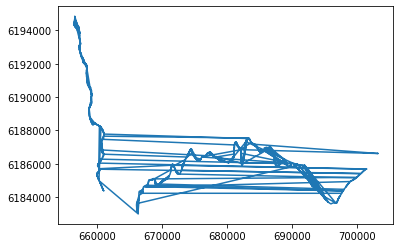

In [38]:
plt.plot(a.X_RGF93_L93,a.Y_RGF93_L93)